In [1]:
import pandas as pd
import os
import csv
from collections import defaultdict
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
with open(os.path.join('data','ListOfCities.csv'), newline='') as f:
    reader = csv.reader(f)
    final_cities = list(reader)
# for i,city in final_cities:
#     players = pd.read_csv("Seasons_Stats.csv",
#                     delimiter = ',',
final_cities = [final_cities[i][0] for i in range(56)]



In [3]:
city_data_dict = defaultdict(list)
for i in range(len(final_cities)):
    data = pd.read_csv(os.path.join("data","{}.csv".format(final_cities[i])), delimiter = ',')
    city_name = final_cities[i][0]
    city_data_dict[city_name].append(data)
    

In [4]:
city_data_list = []
for i in range(len(final_cities)):
    data = pd.read_csv(os.path.join("data","{}.csv".format(final_cities[i])), delimiter = ',', header = None)
    data.columns = ['{}'.format(final_cities[i]), 'Value'] 
    data.index +=1
    city_data_list.append(data)
    
           

In [5]:
indian_states = ["Andhra Pradesh","Arunachal Pradesh ","Assam","Bihar","Chhattisgarh","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu and Kashmir","Jharkhand","Karnataka","Kerala","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal","Andaman and Nicobar Islands","Chandigarh","Dadra and Nagar Haveli","Daman and Diu","Lakshadweep","Delhi","Puducherry"]


In [6]:
from indian_cities.dj_city import cities
from collections import defaultdict

In [7]:
states_cities_dict = defaultdict(list)
cities_list = []
cnt=0
for state in indian_states:
    for i in range(len(cities)):
        if state == cities[i][0]:
            for j in range(len(cities[i][1])):
                city = set([city for city in cities[i][1][j] if city in final_cities])
                if len(city) == 1:
                    cnt+=1
                    c = city.pop()
                    states_cities_dict[state].append(c)
                    cities_list.append(c)


In [8]:
states_cities_dict["Karnataka"].append("Bangalore")
states_cities_dict["West Bengal"].append("Burdwan")
states_cities_dict["Assam"].append("Guwahati")
states_cities_dict["Uttar Pradesh"].append("Lucknow")
states_cities_dict["Uttar Pradesh"].append("Greater Noida")
states_cities_dict["Punjab"].append("Mohali")
states_cities_dict["Goa"].append("Goa")
states_cities_dict["Kerala"].append("Ernakulum")
states_cities_dict["Kerala"].append("Kozhikode")
states_cities_dict["Maharashtra"].append("Navi Mumbai")
states_cities_dict["Maharashtra"].append("Thane")
states_cities_dict["Maharashtra"].append("Vasai")


In [9]:
states_cities = states_cities_dict

In [10]:
states = list(states_cities_dict.keys())
states_df = pd.DataFrame(states, columns = ['States']) 
states_df.index += 1

states_df



,States
1,Andhra Pradesh
2,Bihar
3,Chhattisgarh
4,Gujarat
5,Haryana
6,Jammu and Kashmir
7,Karnataka
8,Kerala
9,Madhya Pradesh
10,Maharashtra


In [11]:
state_select = input("Choose the index number for the state in which the city is (data exists for {} states):\n".format(len(states_df.index)))

state = states_df.iloc[int(state_select)-1,0]
 
cities_in_state = pd.DataFrame(states_cities_dict['{}'.format(states_df["States"][int(state_select)])],
                               columns = ['Cities in {}'.format(state)])
cities_in_state.index += 1
cities_in_state


Choose the index number for the state in which the city is (data exists for 23 states):
19


,Cities in West Bengal
1,Kolkata
2,Burdwan


In [12]:
city = input("Choose index number of desired city (From 1 to {})\n".format(len(cities_in_state.index)))



Choose index number of desired city (From 1 to 2)
1


In [13]:
def get_non_negative_int(prompt):
    while True:
        try:
            value = int(input(prompt))
        except ValueError:
            print("Sorry, I didn't understand that.")
            continue

        if value < 0:
            print("Sorry, your response must not be negative.")
            continue
        else:
            break
    return value

In [14]:

members = get_non_negative_int("How many members are there in your household?\n")

apartment_location = get_non_negative_int("Where is your apartment? (0 for In City Centre, 1 for Outside City Centre)\n")

apartment_bedroom = get_non_negative_int("1 BHK or 3 BHK? (0 for 1 BHK, 1 for 3 BHK)\n")
if int(apartment_bedroom) == 1:
    apartment_type = get_non_negative_int("What is your apartment type? (0 for on rent, 1 for own, 2 for sharing)\n")
    if int(apartment_type) == 1:
        loan = get_non_negative_int("Type 1 if you have taken a loan\n")
elif int(apartment_bedroom) == 0:
    apartment_type = get_non_negative_int("What is your apartment type? (0 for on rent, 1 for own)\n")
    if int(apartment_type) == 1:
        loan = get_non_negative_int("Type 1 if you have taken a loan: \n")

    
child_kindergarten = get_non_negative_int("How many children go to kindergarten?\n")

child_school = get_non_negative_int("How many children go to school?\n")

child_college = get_non_negative_int("Enter college costs of child (monthly, 0 if no child goes to college): \n")

car = get_non_negative_int("What type of car do you own? (0 for I don't own one, 1 for small family car, 2 for sedan, 3 for SUV))\n")
if int(car) != 0:
    car_drive = get_non_negative_int("How often do you drive your car a day? (Enter approx. number of kilometres)\n")
else:
    car_drive = 0

bike = get_non_negative_int("What type of two-wheeler do you own? (0 for I don't own one, 1 for 75-150 cc, 2 for 150-250 cc, 3 for >300 cc)\n")
if int(bike) != 0:
    bike_drive = get_non_negative_int("How often do you drive your two-wheeler a day? (Enter approx. number of kilometres)\n")
else:
    bike_drive = 0

taxi = get_non_negative_int("How many times a month on average do you take round trips on taxis of an average distance of 10 km?\n")

monthly_pass = get_non_negative_int("Do you pay for monthly transport passes for any members? (1 for Yes, 0 for No)\n")
if int(monthly_pass) == 1:
    monthly_pass_amount = get_non_negative_int("For how many members?\n")
else:
    monthly_pass_amount = 0
    
local_transport = get_non_negative_int("How many times a day do you pay for local transport tickets on demand?\n")

restaurant_times = get_non_negative_int("How many times a month do you eat out?\n")

restaurant_inexpensive = get_non_negative_int("What percent of the times do you prefer inexpensive restaurants? (in %)\n")

going_out = get_non_negative_int("How many times a month would you prefer to go out with your entire family (say, for cinemas)?\n")

drink = get_non_negative_int("Do you drink? (0 for no, 1 for occasional, 2 for moderate, 3 for a lot)\n")

smoke = get_non_negative_int("How many cigarette packs do you smoke a month (household overall)?\n")

gym = get_non_negative_int("Do you have fitness club memberships? (1 for Yes, 0 for No)\n")
if int(gym) == 1:
    gym_number = get_non_negative_int("For how many members?\n")
else:
    gym_number = 0
    
clothing = get_non_negative_int("How often do you buy clothes? (1 for Not Much, 2 for Sometimes, 3 for Often, 4 for A Lot)\n")



How many members are there in your household?
4
Where is your apartment? (0 for In City Centre, 1 for Outside City Centre)
0
1 BHK or 3 BHK? (0 for 1 BHK, 1 for 3 BHK)
1
What is your apartment type? (0 for on rent, 1 for own, 2 for sharing)
dfbt
Sorry, I didn't understand that.
What is your apartment type? (0 for on rent, 1 for own, 2 for sharing)
-1
Sorry, your response must not be negative.
What is your apartment type? (0 for on rent, 1 for own, 2 for sharing)
1
Type 1 if you have taken a loan
1
How many children go to kindergarten?
0
How many children go to school?
0
Enter college costs of child (monthly, 0 if no child goes to college): 
10000
What type of car do you own? (0 for I don't own one, 1 for small family car, 2 for sedan, 3 for SUV))
1
How often do you drive your car a day? (Enter approx. number of kilometres)
10
What type of two-wheeler do you own? (0 for I don't own one, 1 for 75-150 cc, 2 for 150-250 cc, 3 for >300 cc)
0
How many times a month on average do you take rou

In [15]:
city = int(city)
req_city = cities_in_state['Cities in {}'.format(state)].iloc[city-1]

In [16]:
for i in range(56):
    if(city_data_list[i].columns[0] == req_city):
        data = city_data_list[i]
data

,Kolkata,Value
1,"Meal, Inexpensive Restaurant",157.76 ₹
2,"Meal for 2 People, Mid-range Restaurant, Three...","1,200.00 ₹"
3,McMeal at McDonalds (or Equivalent Combo Meal),300.00 ₹
4,Domestic Beer (0.5 liter draught),180.00 ₹
5,Imported Beer (0.33 liter bottle),300.00 ₹
6,Cappuccino (regular),127.85 ₹
7,Coke/Pepsi (0.33 liter bottle),29.32 ₹
8,Water (0.33 liter bottle),12.91 ₹
9,"Milk (regular), (1 liter)",53.37 ₹
10,Loaf of Fresh White Bread (500g),32.29 ₹


In [17]:
for i in range(1,len(data)+1):
    data['Value'][i] = data['Value'][i].replace("\xa0₹","")
    data['Value'][i] = data['Value'][i].replace(",","")


In [18]:
def cost_add(i,div, multiplier):
    global cost
    global final_price
    price = data['Value'][i]
    final_price = (float(price)/float(div))*multiplier
    cost += float(final_price)
    return cost

def car_cost_add(car_price):
    global cost
    global car_cost
    car_cost = 0.015104*car_price
    cost += float(car_cost)
    return cost

def gas_cost_add(i,mileage,car_drive):
    global cost
    global gas_price
    price = data['Value'][i]
    gas_price = (float(price)/float(mileage))*float(car_drive)*30
    cost += float(gas_price)
    return cost

def mortgage_add(i, sq_meter):
    global Rent
    L = float(float(data['Value'][i]))*sq_meter
    N = 240.00
    I = float(float(data['Value'][55])/100)
    mortgage = float((L/N) + I*(L/N))
    Rent += float(mortgage)
    return Rent

    


    
    

In [19]:
def Cost_Of_Living_Calculator():
    
    global cost, Rent, Education, Vehicle_Costs_and_Gasoline, Transport, Cigarettes, Fitness, Going_Out
    global Clothing, Alcohol, Utilities, Food, Others
    
    
    cost = 0
    Rent = 0
    Education = 0
    Vehicle_Costs_and_Gasoline = 0
    Transport = 0
    Cigarettes = 0
    Fitness = 0
    Going_Out = 0
    Clothing = 0
    Alcohol = 0
    Utilities = 0
    Food = 0
    Others = 0
    
    
    if int(apartment_bedroom) == 1:
        if int(apartment_type) == 0:
            if int(apartment_location) == 0:
                cost_add(50,1,1)
                Rent += final_price
            else:
                cost_add(51,1,1)
                Rent += final_price
        elif int(apartment_type) == 2:
            if int(apartment_location) == 0:
                cost_add(50,3,1)
                Rent += final_price
            else:
                cost_add(51,3,1)
                Rent += final_price
        elif int(apartment_type) == 1 and int(loan) == 1:
            if int(apartment_location) == 0:
                mortgage_add(50,90)
            else:
                mortgage_add(51,90)
    

    elif int(apartment_bedroom) == 0:
        if int(apartment_type) == 0:
            if int(apartment_location) == 0:
                cost_add(48,1,1)
                Rent += final_price
            elif int(apartment_location) == 1:
                cost_add(49,1,1)
                Rent += final_price
        elif int(apartment_type) == 1 and int(loan) ==1:
            if int(apartment_location) == 0:
                mortgage_add(48,45)
    #             Rent += mortgage
            elif int(apartment_location) == 1:
                mortgage_add(49,45)
    #             Rent += Mortgage      

    cost_add(42,1, int(child_kindergarten))
    Education += final_price
    cost_add(43,12, int(child_school))
    Education += final_price
    Education += float(child_college)


    if int(car) == 1:
        car_cost_add(600000)
        Vehicle_Costs_and_Gasoline += car_cost
        gas_cost_add(33,24,car_drive)
        Vehicle_Costs_and_Gasoline += gas_price
    elif int(car) == 2:
        car_cost_add(1500000)
        Vehicle_Costs_and_Gasoline += car_cost
        gas_cost_add(33,20,car_drive)
        Vehicle_Costs_and_Gasoline += gas_price
    elif int(car) == 3:
        car_cost_add(2000000)
        Vehicle_Costs_and_Gasoline += car_cost
        gas_cost_add(33,15,car_drive)   
        Vehicle_Costs_and_Gasoline += gas_price


    if int(bike) == 1:
        insurance = 750
        cost += insurance
        Vehicle_Costs_and_Gasoline += insurance
        gas_cost_add(33,60,bike_drive)
        Vehicle_Costs_and_Gasoline += gas_price
    elif int(bike) == 2:
        insurance = 1200
        cost += insurance
        Vehicle_Costs_and_Gasoline += insurance
        gas_cost_add(33,40,bike_drive)
        Vehicle_Costs_and_Gasoline += gas_price
    elif int(bike) == 3:
        insurance = 2000
        cost += insurance
        Vehicle_Costs_and_Gasoline += insurance
        gas_cost_add(33,20,bike_drive)
        Vehicle_Costs_and_Gasoline += gas_price


    cost_add(30,1,int(taxi))
    Transport += final_price
    cost_add(31,1/10,int(taxi))
    Transport += final_price
    cost_add(32,12,int(taxi))
    Transport += final_price
    cost_add(29,1,int(monthly_pass_amount))
    Transport += final_price
    cost_add(28,1,int(local_transport)*30)
    Transport += final_price

    cost_add(27,1,int(smoke))
    Cigarettes += final_price

    cost_add(39,1,int(gym_number))
    Fitness+= final_price



    inexpensive_eating_out = (float(data['Value'][1])*int(members)*int(restaurant_times)*(int(restaurant_inexpensive)/100))
    expensive_eating_out = (float(data['Value'][2])*((int(members)/2))*int(restaurant_times)*(1-(int(restaurant_inexpensive)/100)))
    drinks = (float(data['Value'][7]) + float(data['Value'][8])) * int(members) * int(restaurant_times)
    cost += inexpensive_eating_out
    Going_Out += inexpensive_eating_out
    cost += expensive_eating_out
    Going_Out += expensive_eating_out
    cost += drinks
    Going_Out += drinks

    cinema = (float(data['Value'][41]) + float(data['Value'][7]) + float(data['Value'][8]) + float(data['Value'][1])) * int(members) * int(going_out)
    cost += cinema
    Going_Out += cinema

    clothes = (float(data['Value'][44]) + float(data['Value'][45]) + float(data['Value'][46]) + float(data['Value'][47]))*int(clothing)*0.05*int(members)
    cost += clothes
    Clothing += clothes

    if int(drink) == 1:
        cost_add(24,1,int(drink))
        Alcohol += final_price
        cost_add(25,1,int(drink))
        Alcohol += final_price
        cost_add(26,1,int(drink))
        Alcohol += final_price
    elif int(drink) == 2:
        cost_add(24,1,int(drink))
        Alcohol += final_price
        cost_add(25,1,int(drink)+1)
        Alcohol += final_price
        cost_add(26,1,int(drink)+1)
        Alcohol += final_price
    elif int(drink) == 3:
        cost_add(24,1,int(drink))
        Alcohol += final_price
        cost_add(25,1,int(drink)+3)
        Alcohol += final_price
        cost_add(26,1,int(drink)+3)
        Alcohol += final_price


    cost_add(36,1,1)
    Utilities += final_price
    cost_add(37,1,int(members)*20)
    Utilities += final_price
    cost_add(38,1,1)
    Utilities += final_price


    cost_add(9,1,7.5*int(members))
    Food += final_price
    cost_add(10,1,int(members))
    Food += final_price
    cost_add(12,1,0.75*int(members))
    Food += final_price
    cost_add(11,1,2*int(members))
    Food += final_price
    cost_add(13,1,1)
    Food += final_price
    cost_add(14,1,4*int(members))
    Food += final_price
    cost_add(23,1,5*int(members))
    Food += final_price
    groceries = 1000*int(members)
    cost += groceries
    Food += groceries


    extra = 1000*int(members)
    cost += extra
    Others += extra

    

    





          






    
    
        
            
        

In [20]:
Cost_Of_Living_Calculator()

In [21]:
print("TOTAL COST OF LIVING (monthly): ")
print("Rs. {}\n".format(cost))
print("Please note that the estimator " + '\033[1m' + 'does not include insurance, health-related expenses, parking fees or domestic help. It also does not take into calculations income tax.' + '\033[0m')

TOTAL COST OF LIVING (monthly): 
Rs. 37276.945

Please note that the estimator does not include insurance, health-related expenses, parking fees or domestic help. It also does not take into calculations income tax.


---------------------------------------VISUALISATION-------------------------------------------------------

In [27]:
category_data = {'Categories' : ["Rent", "Education", "Vehicle Costs and Gasoline", "Transport", "Cigarettes", "Fitness",
                               "Going Out", "Clothing", "Alcohol", "Tariffs and Internet", "Food", "Other Goods and Services"],
                'Costs' : [Rent, Education, Vehicle_Costs_and_Gasoline, Transport, Cigarettes, Fitness, Going_Out, Clothing,
                           Alcohol, Utilities, Food, Others]}
category_df = pd.DataFrame(category_data)



In [28]:
df_to_plot = category_df.loc[lambda df: df['Costs'] != 0]

colors = ['plum','lightcyan','deepskyblue','bisque','lightpink','khaki','sandybrown','lightgray','cornflowerblue','lavender','lightcoral','beige']

df_to_plot

,Categories,Costs
0,Rent,19527.487749
1,Education,10000.000000
2,Vehicle Costs and Gasoline,10321.025000
3,Transport,1200.000000
6,Going Out,6502.240000
7,Clothing,5020.084000
9,Tariffs and Internet,5546.590000
10,Food,12480.470000
11,Other Goods and Services,4000.000000


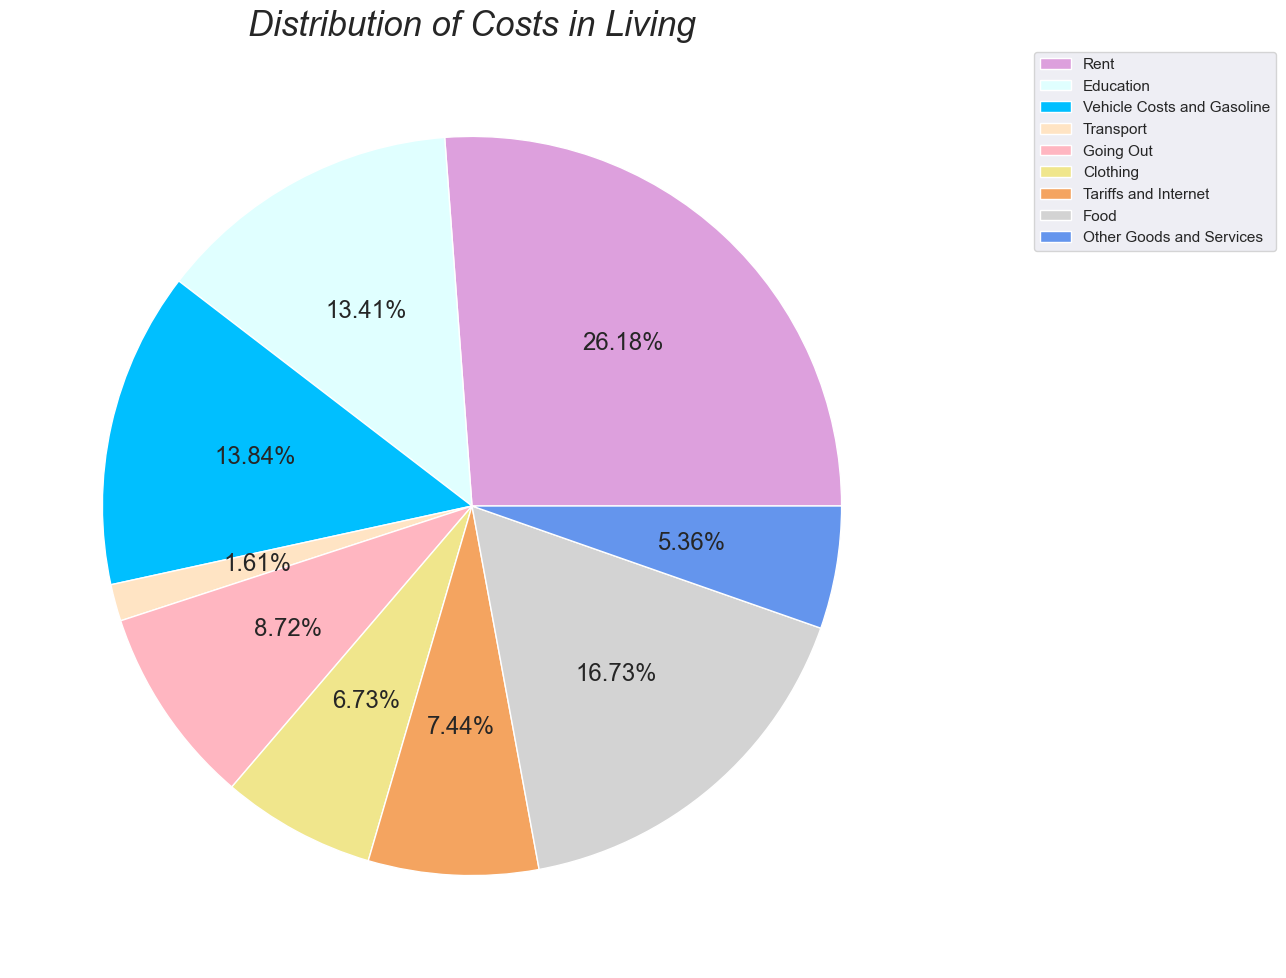

In [29]:
df_to_plot.plot.pie(y='Costs', figsize = (15,12), colors = colors,
                    labels = df_to_plot['Categories'].values,
                    labeldistance = None,
                    autopct = '%.2f%%',
                    textprops = {'size' : 'x-large'})
plt.legend(bbox_to_anchor = (1.1,1))
plt.title("Distribution of Costs in Living", fontsize = 25, fontstyle = 'italic')
plt.axis('off')
plt.show()


In [30]:
cities = ['Kolkata','Chennai','Mumbai','Delhi']
cost_golden_quad_list = []

for city in cities:
    for i in range(56):
        if(city_data_list[i].columns[0] == city):
            data = city_data_list[i]
            for i in range(1,len(data)+1):
                data['Value'][i] = data['Value'][i].replace("\xa0₹","")
                data['Value'][i] = data['Value'][i].replace(",","")
            Cost_Of_Living_Calculator()
            cost_golden_quad_list.append(cost)
cost_golden_quad_list


[37276.945, 38163.507, 42997.601, 45070.409]